## Importação e Pré-Processamento

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
plot = 0


### Importação

In [7]:
# Read the CSV file
df_train = pd.read_csv('dados_trab2/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trab2/conjunto_de_teste.csv')


In [8]:
if (plot):
    df_train.describe()

### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [9]:
df_train.columns

Index(['Id', 'tipo', 'bairro', 'tipo_vendedor', 'quartos', 'suites', 'vagas',
       'area_util', 'area_extra', 'diferenciais', 'churrasqueira',
       'estacionamento', 'piscina', 'playground', 'quadra', 's_festas',
       's_jogos', 's_ginastica', 'sauna', 'vista_mar', 'preco'],
      dtype='object')

In [10]:
excluded_columns = ['Id' ]
df_train = df_train.drop(excluded_columns, axis=1)

test_ids = df_test['Id']
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos


In [11]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])



In [12]:
string_columns

Index(['tipo', 'bairro', 'tipo_vendedor', 'diferenciais'], dtype='object')

### Verificar elementos nulos nos dados de teste.

In [13]:
# Verificar quais colunas têm valores nulos
null_columns_test = df_test_encoded.isnull().sum()
null_columns_test = null_columns_test[null_columns_test > 0]
print(null_columns_test)


Series([], dtype: int64)


In [14]:
if (not null_columns_test.empty):
    # Preencher valores nulos com a mediana das colunas
    df_test_encoded.fillna(df_test_encoded.median(), inplace=True)

# Verificar novamente se há valores nulos
null_columns_test_after = df_test_encoded.isnull().sum()
null_columns_test_after = null_columns_test_after[null_columns_test_after > 0]
print(null_columns_test_after)

Series([], dtype: int64)


### Verificar elementos nulos nos dados de treino.

In [15]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


Series([], dtype: int64)


In [16]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
#null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
null_columns_to_drop = []
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()
df_test_no_null_rows = df_test_encoded.drop(columns=null_columns_to_drop).dropna()


### Selecionar dataSet

In [19]:
usingData = df_no_null_rows
usingTestData = df_test_no_null_rows

In [20]:
print(f'Shape:\nTreino: {usingData.shape}\nTeste:{usingTestData.shape}\n É esperado que o treino tenha uma variável a mais (alvo)')

Shape:
Treino: (4683, 20)
Teste:(2000, 19)
 É esperado que o treino tenha uma variável a mais (alvo)


### Visualizar DataSet

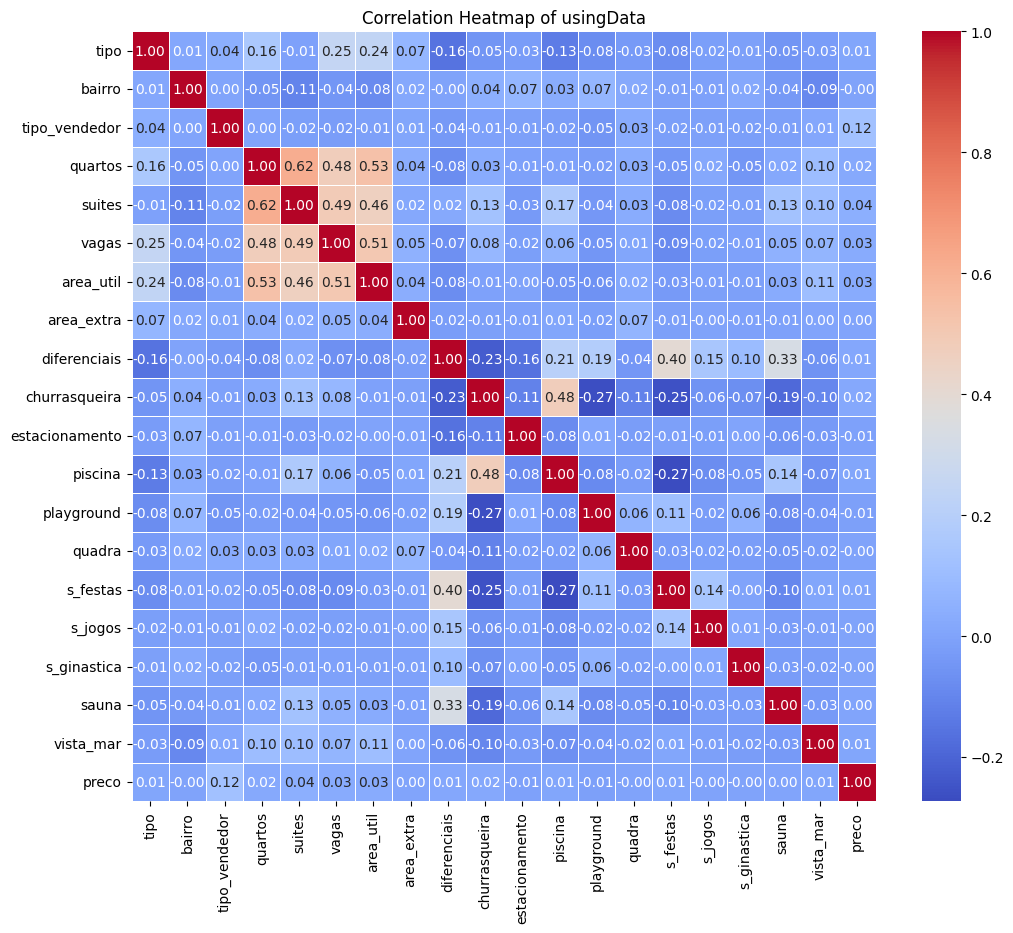

In [14]:
# Compute the correlation matrix
corr = usingData.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of usingData')
plt.show()

In [15]:
# Ordenar as correlações da coluna 'preco' em ordem decrescente
sorted_corr = corr['preco'].sort_values(ascending=False)

# Exibir a lista ordenada
print(sorted_corr)

preco             1.000000
tipo_vendedor     0.124047
suites            0.042131
vagas             0.029046
area_util         0.027557
quartos           0.020892
churrasqueira     0.015878
diferenciais      0.011180
vista_mar         0.007658
s_festas          0.007545
tipo              0.007523
piscina           0.006809
sauna             0.001168
area_extra        0.001141
s_ginastica      -0.002295
s_jogos          -0.002539
bairro           -0.004255
quadra           -0.004386
estacionamento   -0.006367
playground       -0.012199
Name: preco, dtype: float64


In [16]:
# for column in usingData.columns:
#     if column != 'preco':
#         plt.figure(figsize=(10, 6))
#         plt.scatter(usingData[column], usingData['preco'], alpha=0.5)
#         plt.title(f'Scatter plot of {column} vs Preço')
#         plt.xlabel(column)
#         plt.ylabel('Preço')
#         plt.show()


### Discretizar valores float.


In [17]:
# for colname in usingData.select_dtypes("float"):
#     usingData[colname] = usingData[colname].astype(int)


In [18]:
# discrete_features = usingData.dtypes == int
# False in discrete_features

# # Retorna False --> Todos os atributos sao discretos.

In [ ]:
# discrete_features = usingData.dtypes == int
# False in discrete_features

# # Retorna False --> Todos os atributos sao discretos.

### Tratar Outliers

In [29]:
# initHigh = 0.99
# initLow = 0.0001

initHigh = 0.96
initLow = 0.001

fac_flag = True
fac = 1

usingData['preco'].quantile([initLow, initHigh])

# sorted(usingData['preco'].unique())[0]

0.001     100000.0
0.960    2000000.0
Name: preco, dtype: float64

In [30]:
# Calcular o IQR para as colunas especificadas
columns_to_check = usingData.columns.to_list() # ['preco']


quantile_ranges = {col: [initLow,initHigh] for col in columns_to_check}
print(quantile_ranges)

{'tipo': [0.001, 0.96], 'bairro': [0.001, 0.96], 'tipo_vendedor': [0.001, 0.96], 'quartos': [0.001, 0.96], 'suites': [0.001, 0.96], 'vagas': [0.001, 0.96], 'area_util': [0.001, 0.96], 'area_extra': [0.001, 0.96], 'diferenciais': [0.001, 0.96], 'churrasqueira': [0.001, 0.96], 'estacionamento': [0.001, 0.96], 'piscina': [0.001, 0.96], 'playground': [0.001, 0.96], 'quadra': [0.001, 0.96], 's_festas': [0.001, 0.96], 's_jogos': [0.001, 0.96], 's_ginastica': [0.001, 0.96], 'sauna': [0.001, 0.96], 'vista_mar': [0.001, 0.96], 'preco': [0.001, 0.96]}


In [31]:
print('Análise da variável preco')
usingData['preco'].describe()

Análise da variável preco


count    4.683000e+03
mean     9.277053e+05
std      1.050607e+07
min      7.500000e+02
25%      3.550000e+05
50%      5.150000e+05
75%      8.300000e+05
max      6.300000e+08
Name: preco, dtype: float64

In [33]:
print(f'Valores de quantil {initLow} e {initHigh} para a variável preco')
usingData['preco'].quantile([initLow, initHigh])

Valores de quantil 0.001 e 0.96


0.001     100000.0
0.960    2000000.0
Name: preco, dtype: float64

#### Visualização Inicial

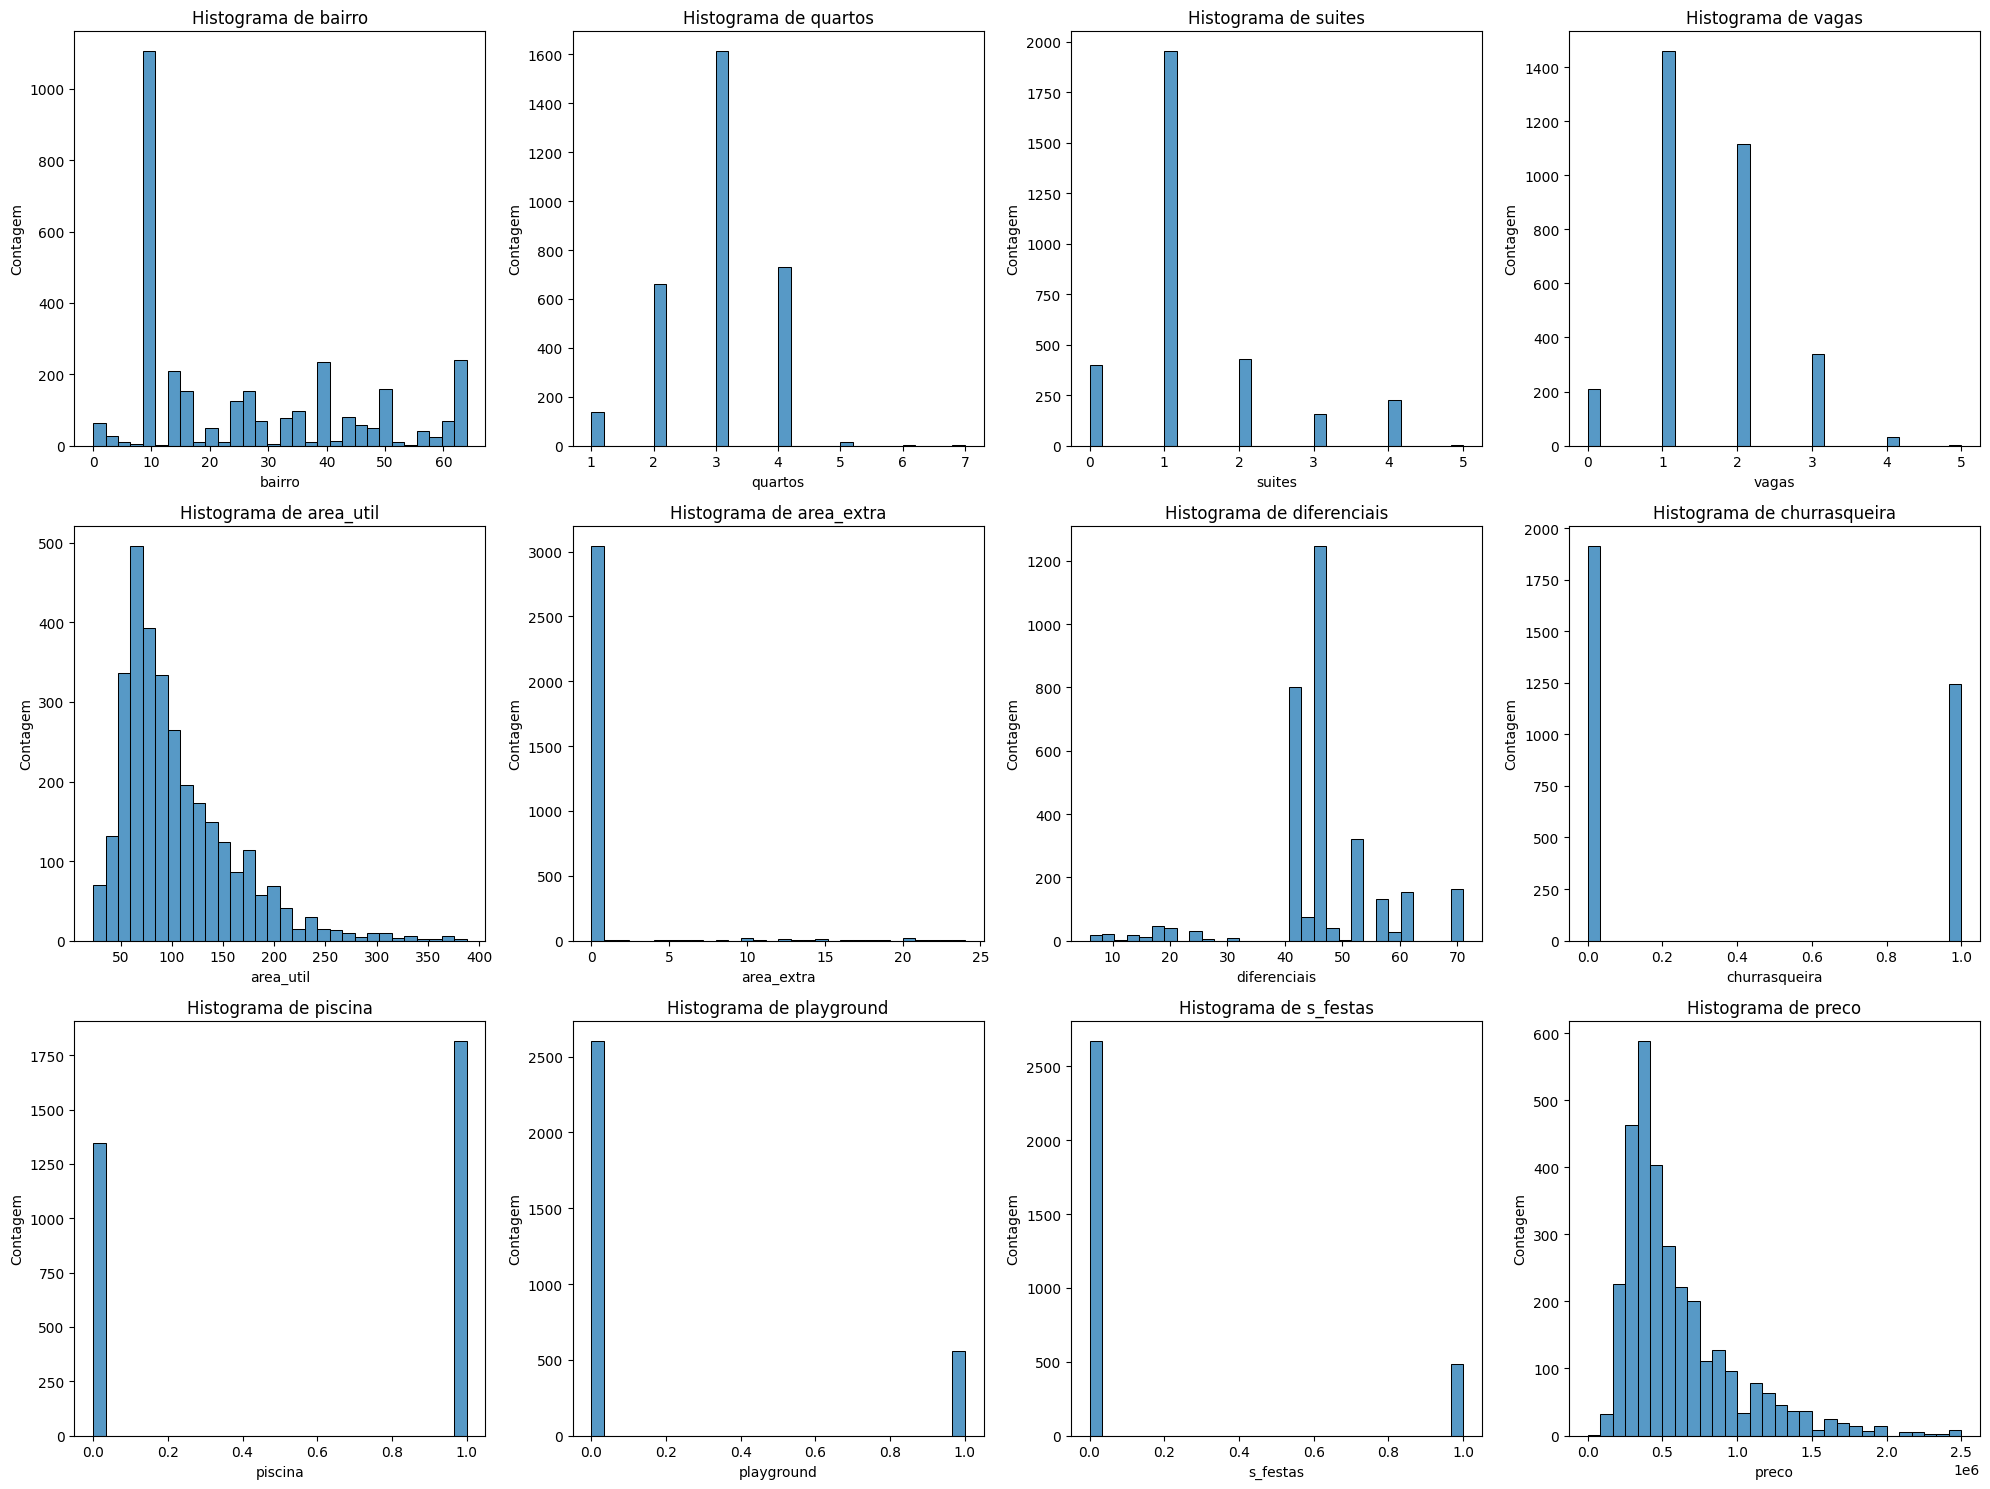

In [47]:
if (1):
    selectColumnVisualize = usingData.columns[6]
    num_columns = 4
    num_rows = (len(usingData.columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(usingData.columns):
        sns.histplot(usingData, x=column, kde=False, bins=30, ax=axes[i])
        axes[i].set_title(f'Histograma de {column}')
        axes[i].set_xlabel(f'{column}')
        axes[i].set_ylabel('Contagem')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [24]:
# usingData[selectColumnVisualize].quantile(0.05)

#### Filtragem por quantil

In [25]:
usingData2_no_outlier = usingData.copy()
for col in columns_to_check:# [selectColumnVisualize]:
    qLow, qHigh = quantile_ranges[col]
    Q1 = usingData[col].quantile(qLow)
    Q3 = usingData[col].quantile(qHigh)
    IQR = Q3 - Q1

    # Filtrar os outliers (apenas para valores mais altos)
    if(fac_flag):
        usingData2_no_outlier = usingData2_no_outlier[~((usingData2_no_outlier[col] > (Q3 + IQR*fac)) | (usingData2_no_outlier[col] < (Q1 - IQR*fac)))]
    else:
    
        usingData2_no_outlier = usingData2_no_outlier[~((usingData2_no_outlier[col] > (Q3)) | (usingData2_no_outlier[col] < (Q1)))]
    # if(col == 'suites'):
    #     print(Q1, Q3, IQR)
    #     print(Q3 + IQR)
    #     print(usingData2_no_outlier['suites'].describe())
    #print(usingData2_no_outlier)


#### Visualização final

In [26]:
usingData2_no_outlier.shape

(3159, 20)

In [27]:
usingData2_no_outlier['preco'].describe()

count    3.159000e+03
mean     6.002377e+05
std      3.828058e+05
min      7.500000e+02
25%      3.480000e+05
50%      4.750000e+05
75%      7.489950e+05
max      2.500000e+06
Name: preco, dtype: float64

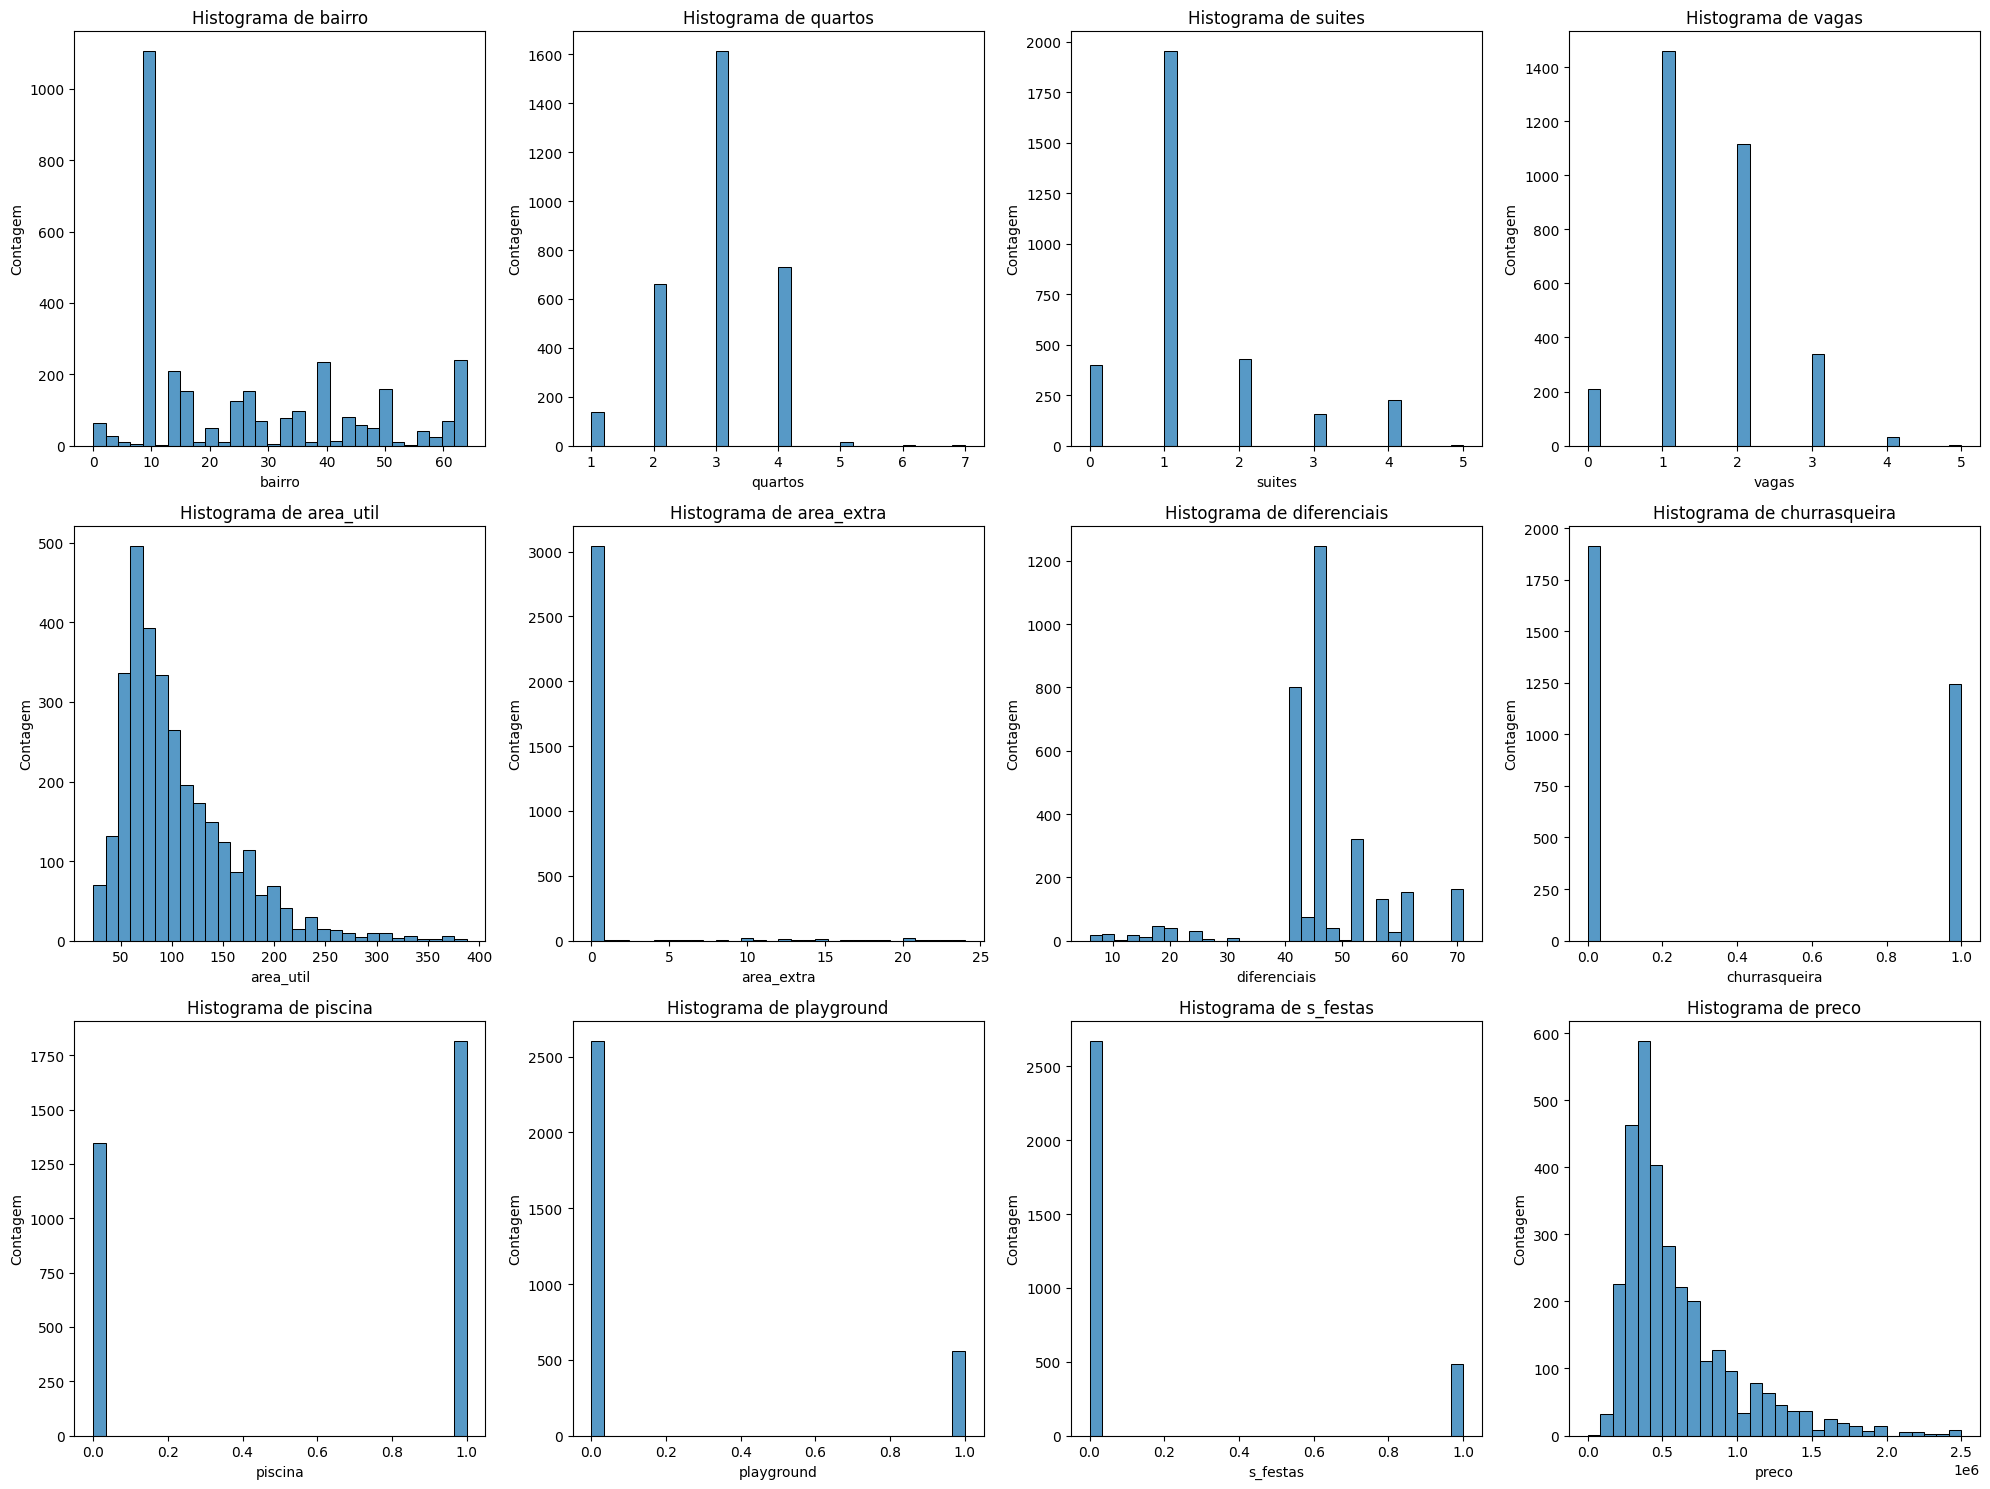

In [48]:
#selectColumnVisualize = usingData.columns[10]
if(1):
    num_columns = 4
    num_rows = (len(usingData2_no_outlier.columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(usingData2_no_outlier.columns):
        sns.histplot(usingData2_no_outlier, x=column, kde=False, bins=30, ax=axes[i])
        axes[i].set_title(f'Histograma de {column}')
        axes[i].set_xlabel(f'{column}')
        axes[i].set_ylabel('Contagem')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#### Cortar colunas com valores unicos

In [29]:
# Verificar colunas com apenas um valor único
unique_value_columns = usingData2_no_outlier.columns[usingData2_no_outlier.nunique() == 1]

# Remover essas colunas
usingData2_no_outlier = usingData2_no_outlier.drop(unique_value_columns, axis=1)
usingTestData_no_outlier = usingTestData.drop(unique_value_columns, axis=1)

print(f'Colunas removidas: {unique_value_columns.tolist()}')
print(f'Colunas restantes: {usingData2_no_outlier.columns.tolist()}')

Colunas removidas: ['tipo', 'tipo_vendedor', 'estacionamento', 'quadra', 's_jogos', 's_ginastica', 'sauna', 'vista_mar']
Colunas restantes: ['bairro', 'quartos', 'suites', 'vagas', 'area_util', 'area_extra', 'diferenciais', 'churrasqueira', 'piscina', 'playground', 's_festas', 'preco']


#### Usar dataSet recortado?

In [30]:
if (1):
    usingData = usingData2_no_outlier.copy()
    usingTestData = usingTestData_no_outlier.copy()

### Normalizar e Detectar Variáveis com alta correlação

#### Normalizar

In [31]:
usingTestData['preco'] = np.nan

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize usingData
usingData_scaled = scaler.fit_transform(usingData)

# Convert the scaled data back to a DataFrame
usingData_scaled = pd.DataFrame(usingData_scaled, columns=usingData.columns)

# Normalize usingTestData_final
usingTestData_scaled = scaler.transform(usingTestData)

# Convert the scaled test data back to a DataFrame
usingTestData_scaled = pd.DataFrame(usingTestData_scaled, columns=usingTestData.columns)

#### Correlação Linear

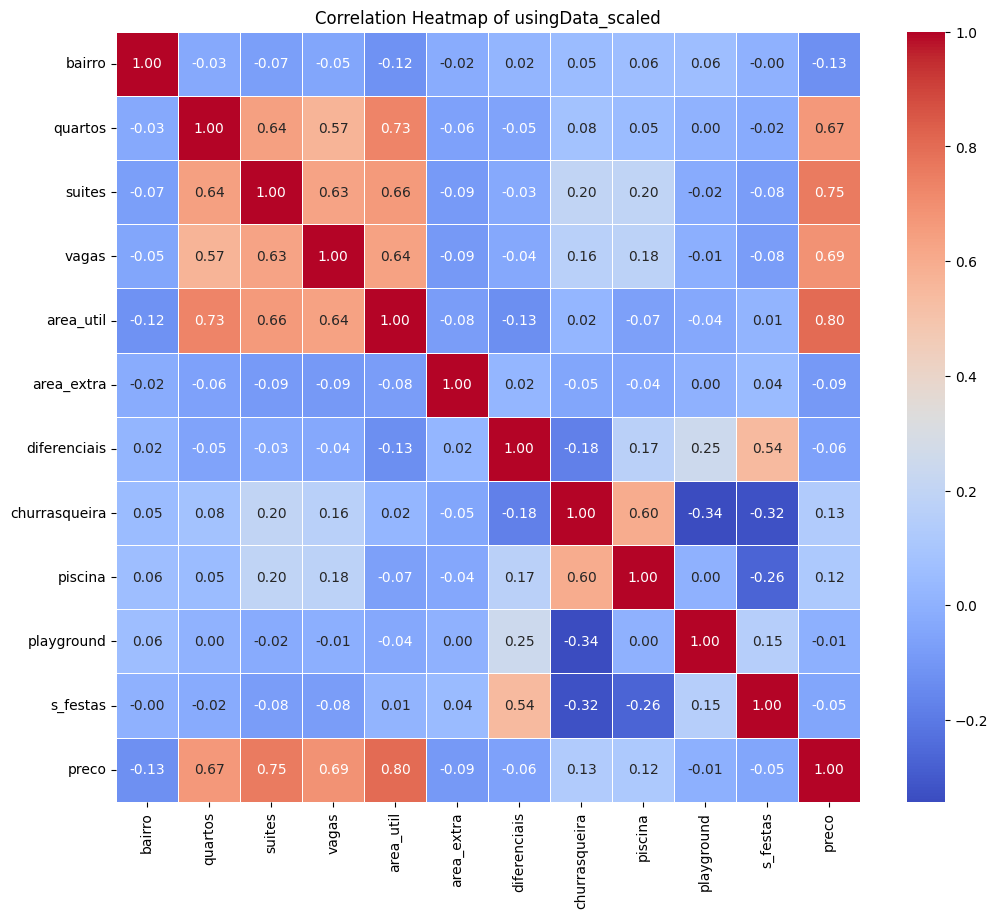

In [33]:
# Compute the correlation matrix
corr_scaled = usingData_scaled.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_scaled, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of usingData_scaled')
plt.show()

In [34]:
# Ordenar as correlações da coluna 'preco' em ordem decrescente
sorted_corr = corr_scaled['preco'].sort_values(ascending=False)

# Exibir a lista ordenada
print(sorted_corr)

preco            1.000000
area_util        0.804506
suites           0.754708
vagas            0.687200
quartos          0.669600
churrasqueira    0.133118
piscina          0.118149
playground      -0.005094
s_festas        -0.045438
diferenciais    -0.059801
area_extra      -0.090835
bairro          -0.125998
Name: preco, dtype: float64


In [ ]:
#A partir do heatMap
# Identificar colunas com correlação maior que k
k = 0.5
high_correlation_columns = corr_scaled.columns[corr_scaled['preco'] > k].tolist()

# Criar um novo DataFrame apenas com essas colunas
high_corr_usingData = usingData_scaled[high_correlation_columns]

print(f'Colunas com alta correlação: {high_correlation_columns}')
print(f'DataFrame com colunas de alta correlação:\n{high_corr_usingData.head()}')

Colunas com alta correlação: ['quartos', 'suites', 'vagas', 'area_util', 'preco']
DataFrame com colunas de alta correlação:
    quartos    suites     vagas  area_util     preco
0  1.320076  2.676499  0.570739   0.953602  0.208395
1  0.067035 -0.322104 -1.882274  -0.936447 -0.392527
2  1.320076  1.676964  0.570739   0.808214  1.253477
3 -1.186006 -0.322104 -0.655768  -0.918273 -0.653797
4  0.067035 -1.321638 -0.655768   0.462916 -0.288018


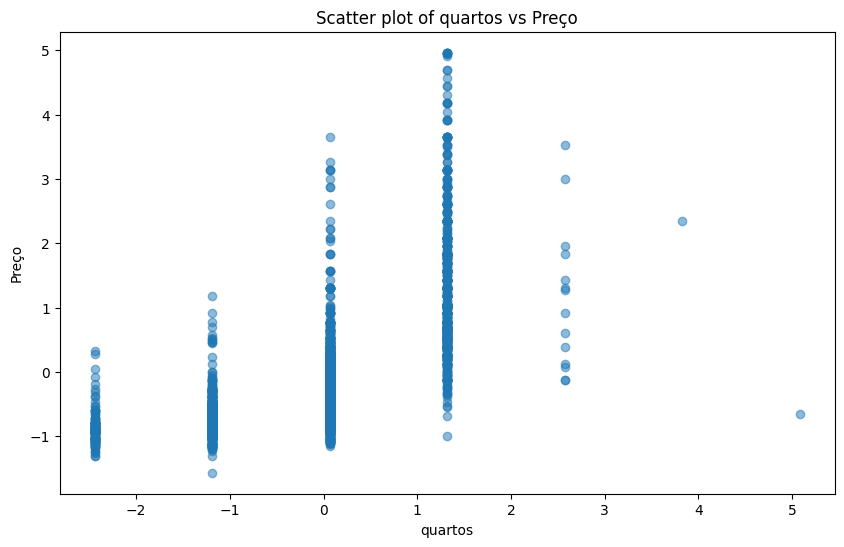

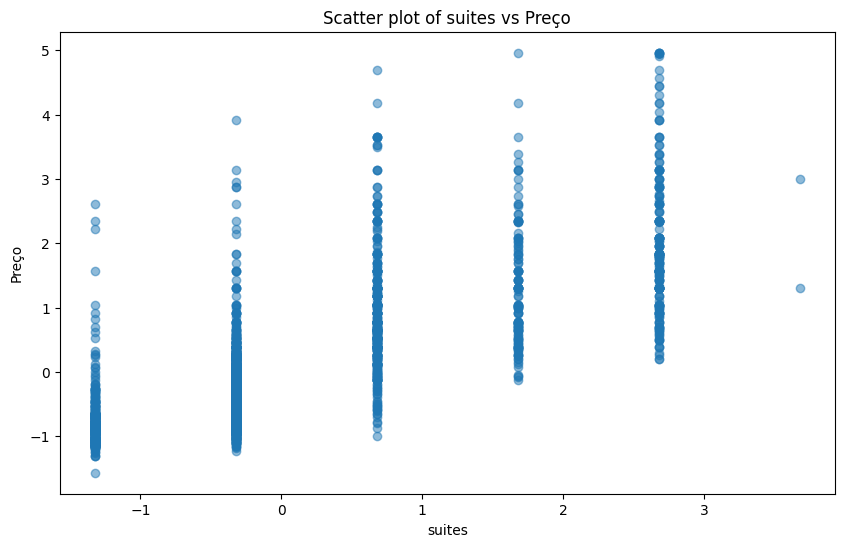

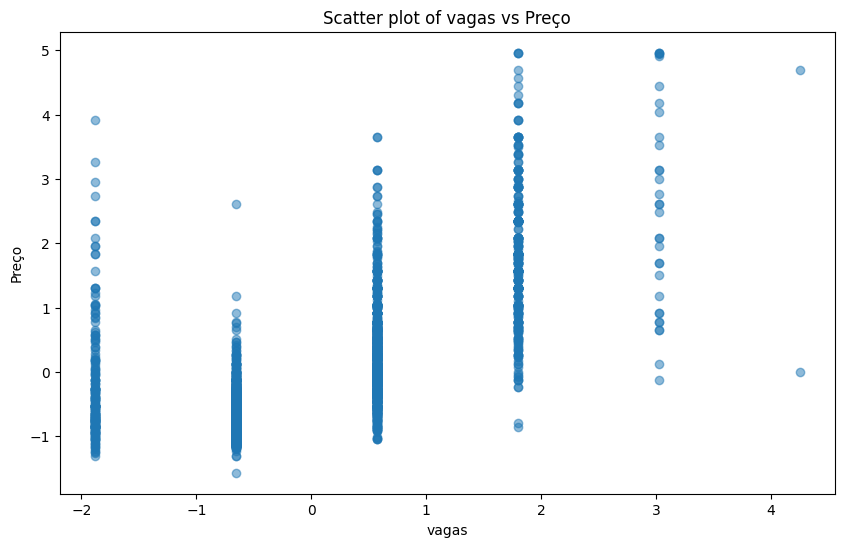

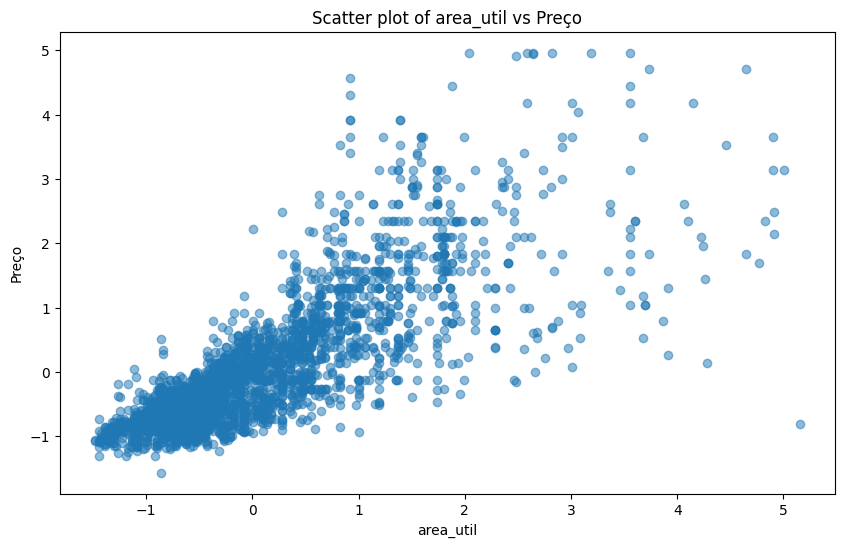

In [36]:
# Plotar scatter plots para cada variável em relação ao preço
for column in high_corr_usingData.columns:
    if column != 'preco':
        plt.figure(figsize=(10, 6))
        plt.scatter(high_corr_usingData[column], high_corr_usingData['preco'], alpha=0.5)
        plt.title(f'Scatter plot of {column} vs Preço')
        plt.xlabel(column)
        plt.ylabel('Preço')
        plt.show()

### Reduzir Dimensão

In [37]:
base_df = usingData2_no_outlier.copy() # usingData_scaled.copy() # 

In [38]:
base_df.shape

(3159, 12)

#### PCA

In [39]:
from sklearn.decomposition import PCA

# Inicializar o PCA
# n_components = 4

pca = PCA(n_components= 0.95)  # Você pode ajustar o número de componentes principais conforme necessário

# Ajustar e transformar os dados
predictors = base_df.drop(columns=['preco']).columns

usingData_pca = pca.fit_transform(base_df[predictors])

# print(usingData_pca)
# Converter os dados transformados de volta para um DataFrame
columnsList = []
for i in range(pca.components_.shape[0]):
    columnsList.append(f'PC{i+1}') 

usingData_pca_df = pd.DataFrame(usingData_pca, columns=columnsList, index=base_df.index)
usingData_pca_df['preco'] = base_df['preco']

# # Adicionar a coluna 'preco' ao DataFrame PCA
# usingData_pca_df['preco'] = usingData['preco'].values

# Exibir a variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Variância explicada por cada componente principal: {explained_variance}')

# Exibir o DataFrame resultante
print(usingData_pca_df.head())

Variância explicada por cada componente principal: [0.86673217 0.10074371]
         PC1        PC2      preco
1  53.007470  -9.553910   680000.0
2 -51.257293  -4.428860   450000.0
3  45.242407 -14.923211  1080000.0
4 -51.626870  22.581280   350000.0
5  25.838839 -14.847661   490000.0


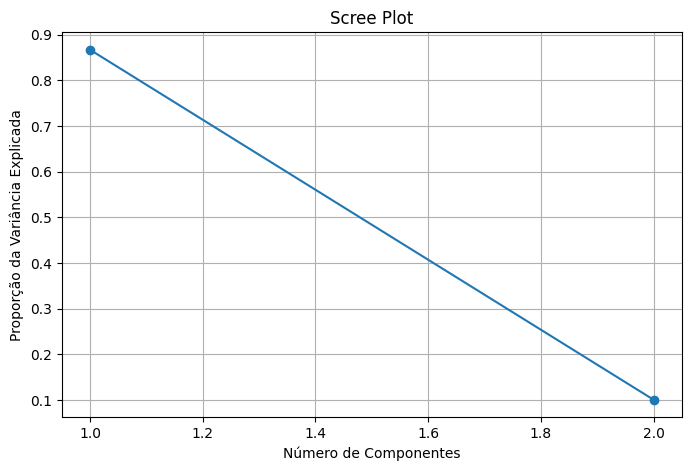

In [40]:

# Variância explicada pelos componentes
explained_variance = pca.explained_variance_ratio_

# Plotar o Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [41]:
# Adicionar a coluna 'preco' com valor 0 em usingTestData

# usingTestData_scaled['preco'] = 0

usingTestData_pca = usingTestData_scaled[predictors].copy()
# Transformar usingTestData usando o modelo PCA
usingTestData_pca = pca.transform(usingTestData_pca)

# Converter os dados transformados de volta para um DataFrame
usingTestData_pca_df = pd.DataFrame(usingTestData_pca, columns=columnsList)

# Exibir o DataFrame resultante
print(usingTestData_pca_df.head())

          PC1        PC2
0 -100.517162 -29.985753
1 -102.458172 -29.511286
2 -101.807208 -31.826555
3 -102.270957 -30.503567
4 -102.735249 -31.103779


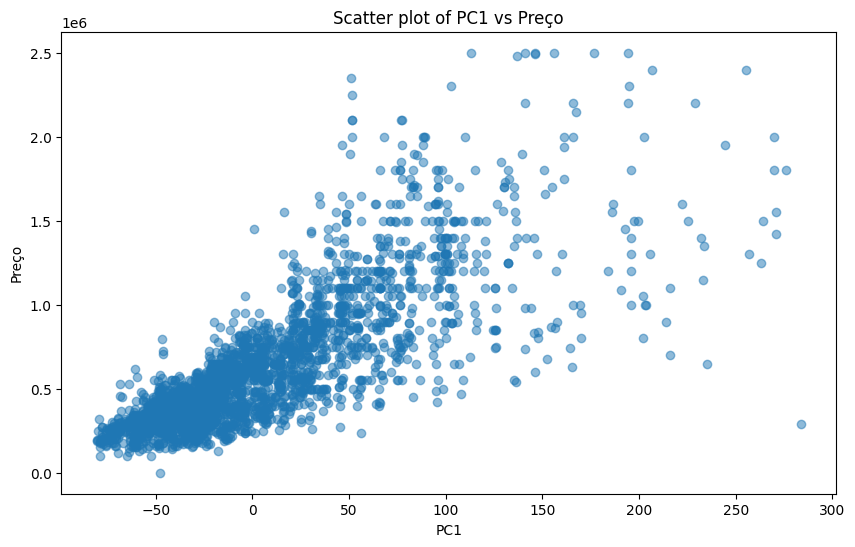

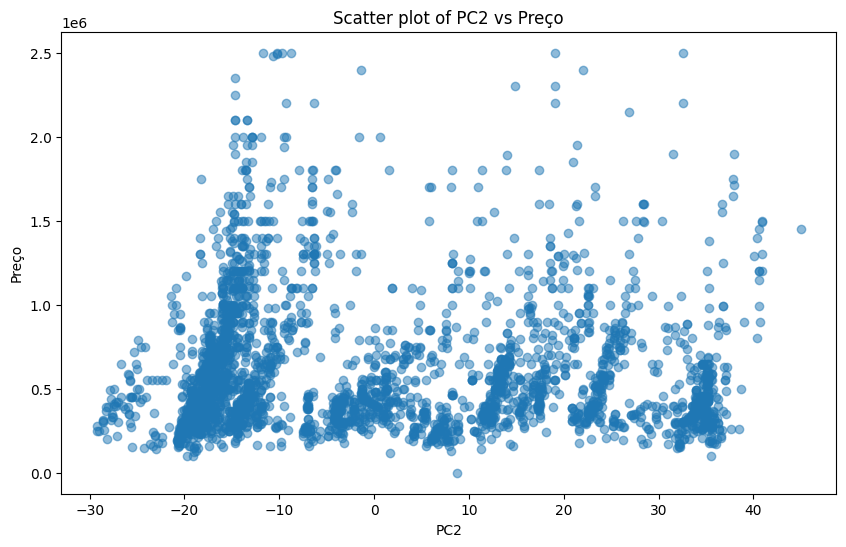

In [42]:
if (1):

    # Plotar scatter plots para cada variável em relação ao preço

    df = usingData_pca_df
    for column in df.columns:
        if column != 'preco':
            plt.figure(figsize=(10, 6))
            plt.scatter(df[column], df['preco'], alpha=0.5)
            plt.title(f'Scatter plot of {column} vs Preço')
            plt.xlabel(column)
            plt.ylabel('Preço')
            plt.show()

#### UMAP

In [43]:
import umap 

# Inicializar o UMAP
n_components = 3
umap_model = umap.UMAP(n_components=n_components, random_state=42)

# Ajustar e transformar os dados
usingData_umap = umap_model.fit_transform(base_df)

columnsList = []
for i in range(n_components):
    columnsList.append(f'UMAP{i+1}')
# Converter os dados transformados de volta para um DataFrame
usingData_umap_df = pd.DataFrame(usingData_umap, columns=columnsList)

# Adicionar a coluna 'preco' ao DataFrame UMAP
usingData_umap_df['preco'] = usingData['preco'].values

# Exibir o DataFrame resultante
print(usingData_umap_df.head())

c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


       UMAP1      UMAP2      UMAP3      preco
0   5.057773   5.035065  -5.531023   680000.0
1   9.623456  15.673235  -3.875082   450000.0
2  16.704512   5.064737   8.250905  1080000.0
3  -2.796955   2.399707   7.041676   350000.0
4  -6.506030  -3.770964  13.929176   490000.0


In [44]:

usingTestData_umap = usingTestData_scaled[base_df.columns].copy()
# Transformar usingTestData usando o modelo PCA
usingTestData_umap = umap_model.transform(usingTestData_umap)

# Converter os dados transformados de volta para um DataFrame
usingTestData_umap_df = pd.DataFrame(usingTestData_umap, columns=columnsList)

# Exibir o DataFrame resultante
print(usingTestData_umap_df.head())

ValueError: Input contains NaN.

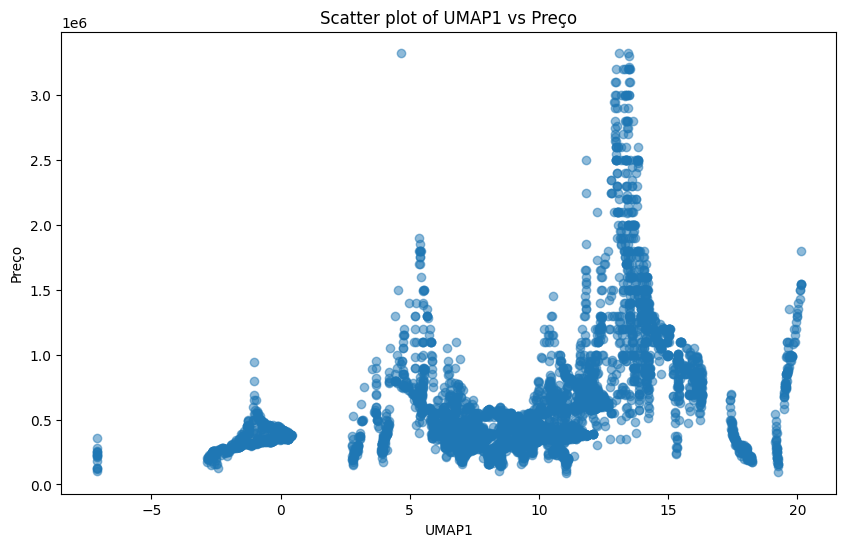

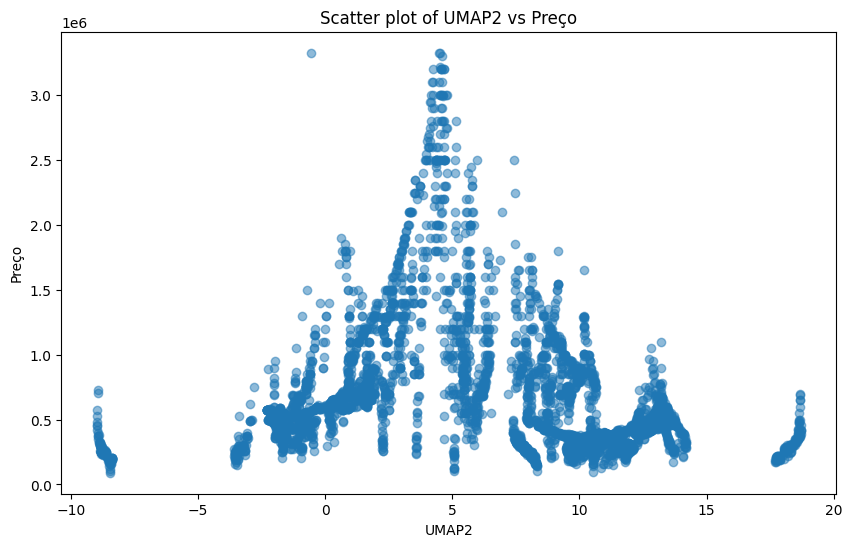

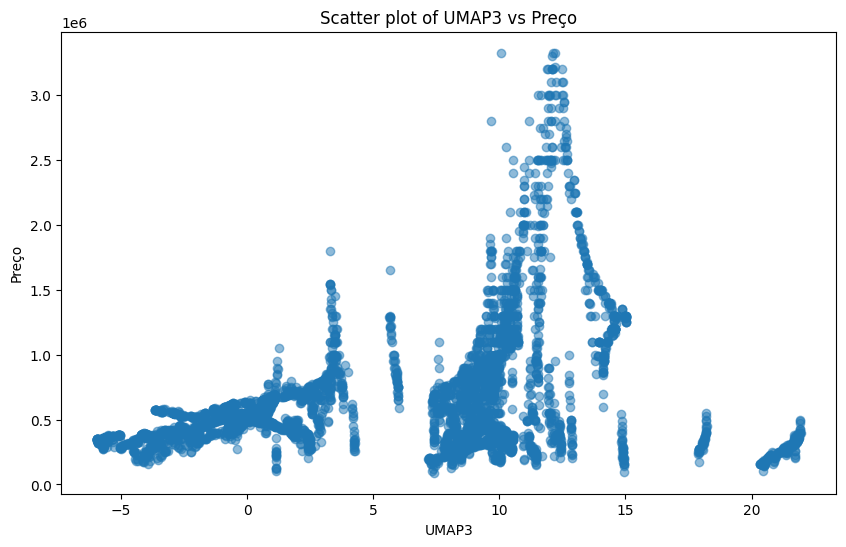

In [169]:
if (1):
    # Plotar scatter plots para cada variável em relação ao preço

    df = usingData_umap_df
    for column in df.columns:
        if column != 'preco':
            plt.figure(figsize=(10, 6))
            plt.scatter(df[column], df['preco'], alpha=0.5)
            plt.title(f'Scatter plot of {column} vs Preço')
            plt.xlabel(column)
            plt.ylabel('Preço')
            plt.show()

### Visualizar DataSet

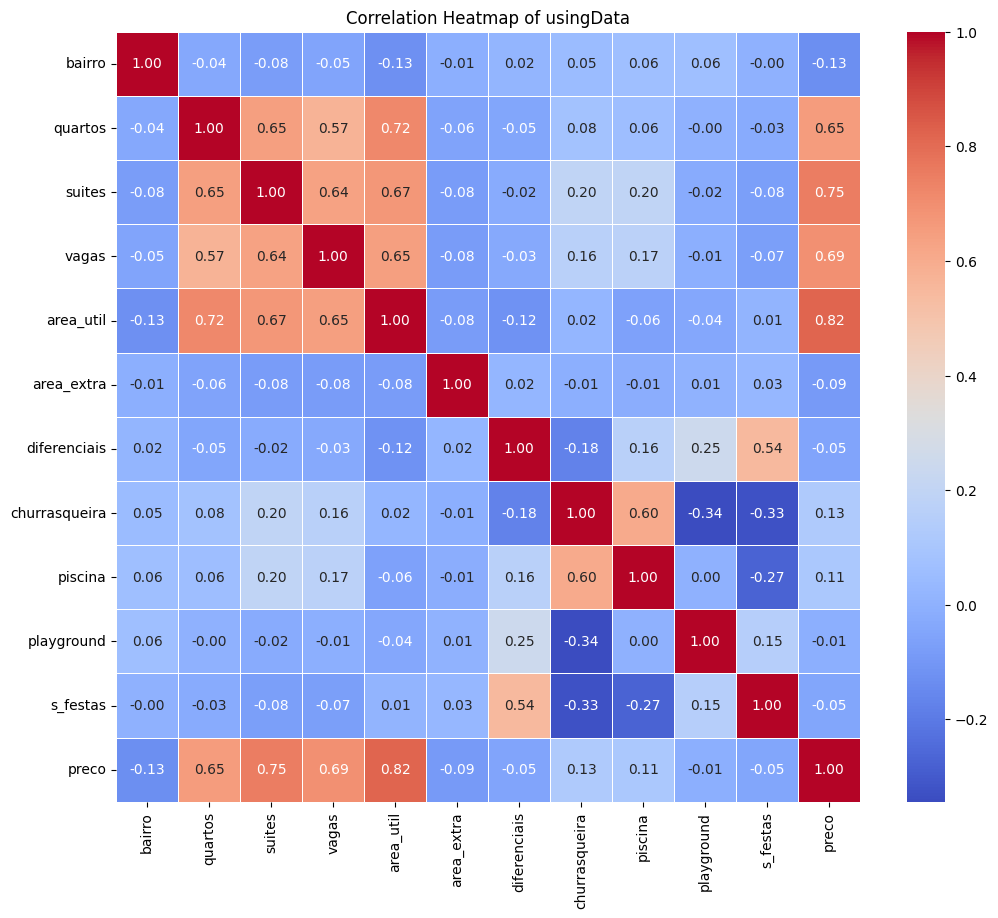

In [41]:
# Compute the correlation matrix
corr = usingData.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of usingData')
plt.show()

In [42]:
# Ordenar as correlações da coluna 'preco' em ordem decrescente
sorted_corr = corr['preco'].sort_values(ascending=False)

# Exibir a lista ordenada
print(sorted_corr)

preco            1.000000
area_util        0.818142
suites           0.752206
vagas            0.693798
quartos          0.653919
churrasqueira    0.125719
piscina          0.110472
playground      -0.012627
s_festas        -0.045630
diferenciais    -0.052451
area_extra      -0.088442
bairro          -0.132133
Name: preco, dtype: float64


In [43]:
# for column in usingData.columns:
#     if column != 'preco':
#         plt.figure(figsize=(10, 6))
#         plt.scatter(usingData[column], usingData['preco'], alpha=0.5)
#         plt.title(f'Scatter plot of {column} vs Preço')
#         plt.xlabel(column)
#         plt.ylabel('Preço')
#         plt.show()

## Treinamento e Predição

In [444]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


In [445]:
transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()
elif(transf_code == 2):
    dftr = usingData.copy()
    dfte = usingTestData.copy()
elif(transf_code == 3):
    dftr = high_corr_usingData.copy()
    dfte = usingTestData
# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Linear Reg

In [486]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

# Split Data
#linData = usingData.copy()

linData = high_corr_usingData.copy()

# linData = usingData_umap_df

X = linData.drop('preco', axis = 1)
y = linData['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Criar um scorer para RMSPE
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Inicializar o modelo de Regressão Linear
model = LinearRegression()

# Realizar a validação cruzada com 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=rmspe_scorer)

# Calcular a média e o desvio padrão do RMSPE
mean_rmspe = -scores.mean()
std_rmspe = scores.std()

print(f'Mean RMSPE: {mean_rmspe}')
print(f'Standard Deviation of RMSPE: {std_rmspe}')

# Treinar o modelo nos dados de treino completos
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular o RMSPE nos dados de teste
test_rmspe = rmspe(y_test, y_pred)
print(f'Test RMSPE: {test_rmspe}')

Mean RMSPE: 7.231446577280606
Standard Deviation of RMSPE: 5.556620341275862
Test RMSPE: 6.148854268637682


In [48]:
for x in range(10):
    print(f'Preço real: {y_test.values[x]}, Preço previsto: {y_pred[x]}')

Preço real: -0.21873305502081422, Preço previsto: -0.5946585757921421
Preço real: 0.11319816073485045, Preço previsto: 0.23475449209018606
Preço real: -0.7092270961446525, Preço previsto: -0.7058894043764725
Preço real: -0.6270800902310204, Preço previsto: -0.9065050700986437
Preço real: 1.1639156782347961, Preço previsto: 0.46129159515170015
Preço real: -0.3405207672764897, Preço previsto: -0.21872503983054534
Preço real: -0.9375193567650952, Preço previsto: -1.034848333849794
Preço real: 1.1639156782347961, Preço previsto: 0.1251093081009701
Preço real: -0.7130478871173795, Preço previsto: -0.6203272285423722
Preço real: -1.0927389900321327, Preço previsto: -1.034848333849794


In [49]:
# Mean RMSPE: 2.3266336043886056
# Standard Deviation of RMSPE: 3.991106965497499
# Test RMSPE: 0.31651161931496097

# Mean RMSPE: 1.9872897310528963
# Standard Deviation of RMSPE: 3.2813788443605074
# Test RMSPE: 0.3303172205888958
# ---> 0.95 ; fac = 0.75


In [50]:
if (0):
    # Selecionar apenas as colunas do usingData final
    usingTestData_final = usingTestData[linData.columns.drop('preco')]

    # Fazer previsões nos dados de teste
    y_test_pred = model.predict(usingTestData_final)

    # Criar um DataFrame com os IDs e os preços previstos
    df_predictions = pd.DataFrame({'Id': test_ids, 'preco': y_test_pred})

    # Salvar o DataFrame em um arquivo CSV
    df_predictions.to_csv('linear_reg_predicted_prices6.csv', index=False)

### XGB

In [483]:
transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()
elif(transf_code == 2):
    dftr = high_corr_usingData.copy()
    dfte = usingTestData.copy()

# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train / Predict

In [484]:
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

# Define RMSPE function
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Create a scorer for RMSPE
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(
    subsample=1.0,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=1.0
)

# Train the model on the full training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')



Root Mean Squared Error (RMSE): 194513.5871489026


In [485]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
from sklearn.model_selection import KFold

# Define RMSPE function
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Create a scorer for RMSPE
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
scores = cross_val_score(xgb_model,    
                         X_train, 
                         y_train, 
                        scoring="r2", 
                        cv=kf)

# Calculate the mean and standard deviation of RMSPE
mean_rmspe = -scores.mean()
std_rmspe = scores.std()

print(f'Mean RMSPE: {mean_rmspe}')
print(f'Standard Deviation of RMSPE: {std_rmspe}')

Mean RMSPE: -0.7012100122935218
Standard Deviation of RMSPE: 0.03290944406334314


In [401]:
for x in range(10):
    print(f'Preço real: {y_test.values[x]}, Preço previsto: {y_pred_xgb[x]}')

Preço real: 521000.0, Preço previsto: 494806.96875
Preço real: 660000.0, Preço previsto: 633069.875
Preço real: 315600.0, Preço previsto: 326478.15625
Preço real: 350000.0, Preço previsto: 320805.6875
Preço real: 1100000.0, Preço previsto: 1080281.75
Preço real: 470000.0, Preço previsto: 475671.46875
Preço real: 220000.0, Preço previsto: 223379.03125
Preço real: 1100000.0, Preço previsto: 702494.1875
Preço real: 314000.0, Preço previsto: 318759.125
Preço real: 155000.0, Preço previsto: 157524.328125


In [66]:
if (0):
    # Selecionar apenas as colunas do usingData final
    usingTestData_final = usingTestData[usingData.columns.drop('preco')]

    # Fazer previsões nos dados de teste
    y_test_pred = xgb_model.predict(usingTestData_final)

    # Criar um DataFrame com os IDs e os preços previstos
    df_predictions = pd.DataFrame({'Id': test_ids, 'preco': y_test_pred})

    # Salvar o DataFrame em um arquivo CSV
    df_predictions.to_csv('xgb_predicted_prices2.csv', index=False)

#### XGB - GridSearch

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# # Define RMSPE function
# def rmspe(y_true, y_pred):
#     return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# # Create a scorer for RMSPE
# rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# # Initialize the XGBoost model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500, 850],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=rmspe_scorer, cv=5, n_jobs=-1, verbose=1)

# # Perform grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# print(f'Best parameters: {best_params}')
# print(f'Best RMSPE: {best_score}')

# # Train the model with the best parameters on the full training data
# best_xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
# best_xgb_model.fit(X_train, y_train)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


KeyboardInterrupt: 

### KNeighborsRegressor

In [458]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()

# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [459]:

# Initialize the K-Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')



Root Mean Squared Error (RMSE): 199296.1289085974


In [460]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# Perform grid search with the extended parameter grid
grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation MSE: {abs(grid_search.best_score_):.2f}")


Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Cross-Validation MSE: 36959983252.28


In [465]:
#Check model's performance with cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

knn = KNeighborsRegressor(
    algorithm='auto',
    leaf_size=20,
    n_neighbors=11,
    p=1,
    weights='distance'
)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score to calculate the scores
mse_scores = cross_val_score(
    knn, 
    X_train, 
    y_train, 
    scoring="r2", 
    cv=kf
)

# Calculate the mean and standard deviation of the MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")


Cross-Validation Mean r2: 0.73
Cross-Validation MSE Std Dev: 0.02


In [ ]:
X_train = dftr.drop('preco', axis=1) 
y_train = dftr['preco']
X_test = dfte.copy()
X_test = X_test[X_train.columns] 

knn = KNeighborsRegressor(
    algorithm='auto',
    leaf_size=20,
    n_neighbors=5,
    p=1,
    weights='distance'
)
knn.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = knn.predict(X_test)

# save predictions
predictions_df = pd.DataFrame({ 'preco': test_predictions , 'Id': test_ids})  
# predictions_df = predictions_df.iloc[1:]
# predictions_df.to_csv('predictions/KNN_tuned_predicted_prices_pca1.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [463]:
# Print some predictions
for i in range(10):
    print(f'Preço real: {y_test.values[i]}, Preço previsto: {y_pred_knn[i]}')

Preço real: 1800000.0, Preço previsto: 1316666.6666666667
Preço real: 1200000.0, Preço previsto: 1233333.3333333333
Preço real: 180000.0, Preço previsto: 331666.6666666667
Preço real: 1500000.0, Preço previsto: 1116666.6666666667
Preço real: 525000.0, Preço previsto: 438333.3333333333
Preço real: 800000.0, Preço previsto: 606666.6666666666
Preço real: 750000.0, Preço previsto: 396666.6666666667
Preço real: 145000.0, Preço previsto: 230000.0
Preço real: 230000.0, Preço previsto: 273000.0
Preço real: 860000.0, Preço previsto: 846666.6666666666


In [464]:
# Calcular o erro para cada aquisição no teste
error_knn = y_test.values - y_pred_knn
error_xgb = y_test.values - y_pred_xgb

# Plotar o erro para cada aquisição no teste
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), error_knn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Erro para cada aquisição no teste (KNN)')
plt.xlabel('Índice')
plt.ylabel('Erro (Real - Previsto)')

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), error_xgb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Erro para cada aquisição no teste (XGB)')
plt.xlabel('Índice')
plt.ylabel('Erro (Real - Previsto)')

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (603,) (928,) 

In [305]:
if (1):

    # Fazer previsões nos dados de teste
    y_test_pred = knn.predict(dfte)

    # Criar um DataFrame com os IDs e os preços previstos
    df_predictions = pd.DataFrame({'Id': test_ids, 'preco': y_test_pred})

    # Salvar o DataFrame em um arquivo CSV
    df_predictions.to_csv('knn_reg_predicted_prices3_umap.csv', index=False)

In [306]:
y_test_pred[:20]

array([1540000.        ,  263333.33333333,  556666.66666667,
        250000.        ,  426666.66666667,  263333.33333333,
        739333.33333333,  390000.        ,  611000.        ,
        543333.33333333,  646666.66666667,  450000.        ,
        719333.33333333,  570000.        ,  910000.        ,
        620000.        ,  582000.        ,  515666.66666667,
        366666.66666667,  576666.66666667])

### Lasso + Tune

In [446]:
transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()
elif(transf_code == 2):
    dftr = usingData.copy()
    dfte = usingTestData.copy()
# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [447]:
#finding the best alpha for LASSO
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100,1000]}  # Define a range of alpha values
grid_search = GridSearchCV(
    Lasso(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)

print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best Cross-Validation MSE: {abs(grid_search.best_score_):.2f}")



Best Alpha: 0.01
Best Cross-Validation MSE: 46389977409.45


In [448]:
#Check model's performance with cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

lasso_model = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score to calculate the scores
mse_scores = cross_val_score(
    lasso_model, 
    X_train, 
    y_train, 
    scoring="r2", 
    cv=kf
)

# Calculate the mean and standard deviation of the MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")


Cross-Validation Mean r2: 0.63
Cross-Validation MSE Std Dev: 0.04


In [402]:

X_train = dftr.drop('preco', axis=1) 
y_train = dftr['preco']
X_test = dfte.copy()
X_test = X_test[X_train.columns] 

lasso = Lasso(alpha=0.01)  
lasso.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = lasso.predict(X_test)

# save predictions
# predictions_df = pd.DataFrame({ 'preco': test_predictions , 'Id': test_ids})  
# predictions_df = predictions_df.iloc[1:]
# predictions_df.to_csv('predictions/lasso_tuned_predicted_prices_pca_outlier2.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [404]:
print(test_predictions)

[ 1.72508073 -0.97362317  0.21484192 ... -0.30001839  0.83253273
 -0.80721744]


### RF + Tune

In [392]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros do modelo Random Forest
param_grid = {
    #'min_samples_leaf': [1, 2, 4, 6 , 8, 10],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42,  n_estimators = 200, max_depth = 30, min_samples_split = 2,min_samples_leaf = 1)

# Inicializar o GridSearchCV
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

# Ajustar o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score:.2f}")


Best parameters: {}
Best Cross-Validation MSE: 0.24


In [393]:
#Check model's performance with cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

rf_model = RandomForestRegressor(random_state=42,  n_estimators = 200, max_depth = 30, min_samples_split = 2,min_samples_leaf = 1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score to calculate the scores
mse_scores = cross_val_score(
    rf_model, 
    X_train, 
    y_train, 
    scoring="r2", 
    cv=kf
)

# Calculate the mean and standard deviation of the MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")


Cross-Validation Mean r2: 0.76
Cross-Validation MSE Std Dev: 0.03


In [53]:

X_train = dftr.drop('preco', axis=1) 
y_train = dftr['preco']
X_test = dfte.copy()
X_test = X_test[X_train.columns] 

rf_model = RandomForestRegressor(random_state=42,  n_estimators = 200, max_depth = 30, min_samples_split = 2,min_samples_leaf = 1)
rf_model.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = rf_model.predict(X_test)

# save predictions
predictions_df = pd.DataFrame({ 'preco': test_predictions , 'Id': test_ids})  
# predictions_df = predictions_df.iloc[1:]
#predictions_df.to_csv('predictions/RF_tuned_predicted_prices_umap.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


### Kernel Ridge + Tune

In [473]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV


# Definir os parâmetros do modelo Elastic Net
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0, 0.5, 1, 2.5]
}

# Inicializar o modelo Elastic Net
KRR = KernelRidge()

# Inicializar o RandomizedSearchCV
grid_search = RandomizedSearchCV(
    KRR,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,
    n_jobs=-1
)

# Ajustar o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score:.2f}")


c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Best parameters: {'kernel': 'poly', 'degree': 4, 'coef0': 2.5, 'alpha': 0.1}
Best Cross-Validation MSE: 40328483440.81


In [474]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definir o modelo KernelRidge com os parâmetros especificados
kr_model = KernelRidge(kernel='poly', degree=4, coef0=2.5, alpha=0.1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score para calcular os scores
mse_scores = cross_val_score(
    kr_model, 
    X_train, 
    y_train, 
    scoring="r2", 
    cv=kf
)

# Calcular a média e o desvio padrão do MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")


c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\

Cross-Validation Mean r2: 0.68
Cross-Validation MSE Std Dev: 0.03


In [470]:

X_train = dftr.drop('preco', axis=1) 
y_train = dftr['preco']
X_test = dfte.copy()
X_test = X_test[X_train.columns] 

kr_model = KernelRidge(kernel='rbf', degree=2, coef0=2.5, alpha=0.1)
kr_model.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = kr_model.predict(X_test)

# save predictions
predictions_df = pd.DataFrame({ 'preco': test_predictions , 'Id': test_ids})  
# predictions_df = predictions_df.iloc[1:]
predictions_df.to_csv('predictions/KR_tuned_predicted_prices_umap.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [471]:
test_predictions

array([3.13459233e-098, 3.61415432e-115, 4.40290836e-118, ...,
       3.02315721e-126, 2.90967564e-109, 7.10242205e-128])

### GBR + Tune

In [477]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

# Definir os parâmetros do modelo Gradient Boosting
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 800],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.4, 0.8, 1.0],
    'alpha': [0.001, 0.01, 0.1, 0.5, 0.9],
}

# Inicializar o modelo Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42, loss='huber')

# Inicializar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    gbr,
    param_distributions,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    n_iter=50,  # Número de combinações de parâmetros a serem testadas
    random_state=42
)

# Ajustar o modelo aos dados de treinamento
random_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
best_params = random_search.best_params_
best_score = -random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score:.2f}")


Best parameters: {'subsample': 0.4, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'alpha': 0.9}
Best Cross-Validation MSE: 35723680393.85


In [478]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definir o modelo KernelRidge com os parâmetros especificados
gbr = GradientBoostingRegressor(random_state=42, loss='huber', n_estimators=500, learning_rate = 0.01, max_depth = 5, subsample = 0.4, alpha = 0.9)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score para calcular os scores
mse_scores = cross_val_score(
    gbr, 
    X_train, 
    y_train, 
    scoring="r2", 
    cv=kf
)

# Calcular a média e o desvio padrão do MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")


Cross-Validation Mean r2: 0.73
Cross-Validation MSE Std Dev: 0.03


In [ ]:

X_train = dftr.drop('preco', axis=1) 
y_train = dftr['preco']
X_test = dfte.copy()
X_test = X_test[X_train.columns] 

gbr = GradientBoostingRegressor(random_state=42, loss='huber', n_estimators=850, learning_rate = 0.2, max_depth = 7, subsample = 1.0, alpha = 0.9)
gbr.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = gbr.predict(X_test)

# save predictions
predictions_df = pd.DataFrame({ 'preco': test_predictions , 'Id': test_ids})  
# predictions_df = predictions_df.iloc[1:]
#predictions_df.to_csv('predictions/GBR_tuned_predicted_prices_pca_fix.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [ ]:
test_predictions

array([959918.00721147, 335443.13324723, 634239.70159889, ...,
       568298.07251076, 768369.41321529, 556428.25678214])

### BenchMark

In [ ]:
transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()
    
# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score



models_and_params = {
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Loop through models for hyperparameter tuning
best_estimators = {}
results = []

for model_name, model_info in models_and_params.items():
    print(f"Tuning {model_name}...")
    
    # Initialize RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=model_info["model"],
        param_distributions=model_info["params"],
        scoring='neg_mean_squared_error',
        cv=5,
        n_iter=10,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    search.fit(X_train, y_train)
    
    # Best estimator and parameters
    best_estimators[model_name] = search.best_estimator_
    best_params = search.best_params_
    
    # Evaluate on the test set
    y_pred = search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": model_name,
        "Best Parameters": best_params,
        "MSE": mse,
        "R² Score": r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


Tuning Decision Tree...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning Lasso...
Tuning XGBoost...


c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_2\myenv2\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


               Model                                    Best Parameters  \
0      Decision Tree  {'min_samples_split': 10, 'min_samples_leaf': ...   
1      Random Forest  {'n_estimators': 300, 'min_samples_split': 2, ...   
2  Gradient Boosting  {'n_estimators': 200, 'max_depth': 5, 'learnin...   
3              Lasso                                    {'alpha': 0.01}   
4            XGBoost  {'subsample': 1.0, 'n_estimators': 300, 'max_d...   

            MSE  R² Score  
0  1.332289e+10  0.931844  
1  8.595007e+09  0.956030  
2  8.011083e+09  0.959018  
3  2.672512e+10  0.863282  
4  7.648494e+09  0.960872  


In [ ]:
results_df['Best Parameters'][1]

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30}

### Visualizar Erro

In [479]:
transf_code = 0
if (transf_code == 0):
    dftr = usingData_pca_df.copy() 
    dfte = usingTestData_pca_df.copy()
elif (transf_code == 1):
    dftr = usingData_umap_df.copy() 
    dfte = usingTestData_umap_df.copy()
elif(transf_code == 2):
    dftr = usingData.copy()
    dfte = usingTestData.copy()
# Split the data into training and testing sets
X = dftr.drop('preco', axis=1)
y = dftr['preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [480]:

# Initialize the K-Neighbors Regressor
model = gbr

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')



Root Mean Squared Error (RMSE): 182178.54643322589


In [481]:
# Print some predictions
for i in range(100,110):
    print(f'Preço real: {y_test.values[i]}, Preço previsto: {y_pred[i]}')


Preço real: 1200000.0, Preço previsto: 999015.955923305
Preço real: 260000.0, Preço previsto: 359210.55977435474
Preço real: 455000.0, Preço previsto: 392561.1500033713
Preço real: 365000.0, Preço previsto: 351346.8335100836
Preço real: 570000.0, Preço previsto: 517965.1235410042
Preço real: 640000.0, Preço previsto: 451024.6730716569
Preço real: 650000.0, Preço previsto: 548830.3391945114
Preço real: 735000.0, Preço previsto: 1228591.7043552578
Preço real: 380000.0, Preço previsto: 398255.5387539765
Preço real: 390000.0, Preço previsto: 398515.0104991388


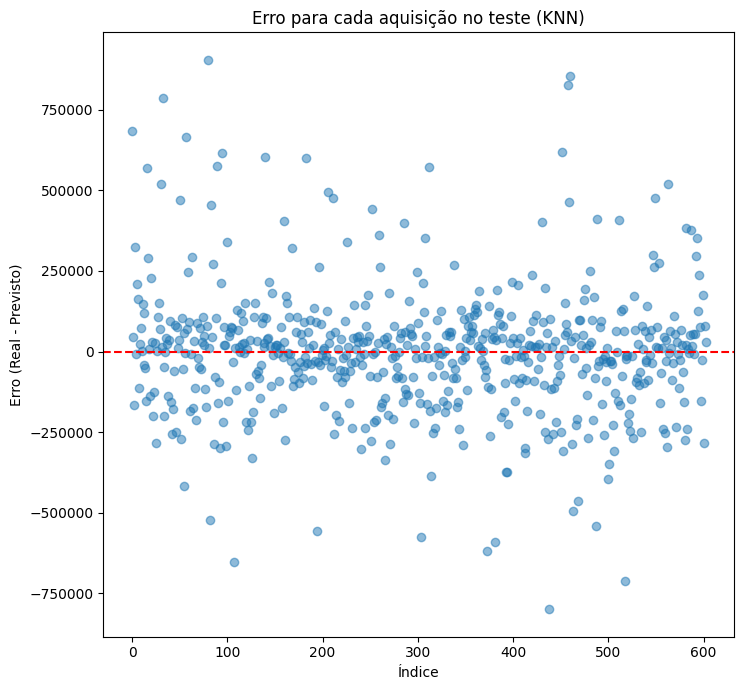

In [452]:
# Calcular o erro para cada aquisição no teste
error = y_test.values - y_pred

# Plotar o erro para cada aquisição no teste
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), error, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Erro para cada aquisição no teste (KNN)')
plt.xlabel('Índice')
plt.ylabel('Erro (Real - Previsto)')


plt.tight_layout()
plt.show()